In [7]:
library(lme4)
library(stats)
df <- read.csv("/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/data_combined.csv", header=T)
n <- nrow(df)
df$person <- factor(df$person)
df$coin <- factor(df$coin)
df$group <- factor(df$group)
df$total_category <- factor(df$total_category)
model_intercept <- glm(cbind(y, m - y) ~ 1, family = binomial, data = df)
summary(model_intercept)



Call:
glm(formula = cbind(y, m - y) ~ 1, family = binomial, data = df)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 0.030799   0.003377   9.119   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 686.86  on 421  degrees of freedom
Residual deviance: 686.86  on 421  degrees of freedom
AIC: 3596

Number of Fisher Scoring iterations: 3


In [8]:
df

X,y,m,person,coin,group,total,total_category
<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>
0,244,485,frantisekB,20DEM-silver,top-up,485,100-500
1,260,505,frantisekB,1CZK,top-up,505,500-1000
2,209,469,frantisekB,5CZK,top-up,469,100-500
3,530,1021,frantisekB,0.25USD,top-up,1021,1000-2000
4,533,1039,frantisekB,10CZK,top-up,1039,1000-2000
5,745,1493,frantisekB,0.50EUR,top-up,1493,1000-2000
6,975,1948,frantisekB,1EUR,top-up,1948,1000-2000
7,2132,4262,ingeborgR,2HRK,marathon,4262,>=2000
8,2215,4177,alexandraS,1MXN,top-up,4177,>=2000


In [6]:
# 设置基础路径
base_path <- "/Users/wenqing_liu/Desktop/第三学期/Regression method/Project/coin data/data-raw/"

# 读取bachelor数据
df_bachelor <- read.csv(paste0(base_path, "merged-bachelor.csv"))
bachelor_persons <- sort(unique(df_bachelor$person))

# 读取internet数据
df_internet <- read.csv(paste0(base_path, "merged-internet.csv"))
internet_persons <- sort(unique(df_internet$person))

# 显示结果
print("本科生组参与者：")
print(bachelor_persons)
cat("\n本科生组共有", length(bachelor_persons), "个参与者\n\n")

print("网络组参与者：")
print(internet_persons)
cat("\n网络组共有", length(internet_persons), "个参与者\n")

# 检查是否有重叠的参与者
overlap <- intersect(bachelor_persons, internet_persons)
if(length(overlap) > 0) {
    print("\n两组重叠的参与者：")
    print(overlap)
}

[1] "本科生组参与者："
[1] "amirS"   "davidKL" "davidV"  "irmaT"   "kaleemU" "pierreG"

本科生组共有 6 个参与者

[1] "网络组参与者："
[1] "FelipeFontanaVieira" "FranziskaNippold"    "FrederikAust"       

网络组共有 3 个参与者


In [18]:
# 创建标记函数
create_source_label <- function(person) {
  bachelor_persons <- c("amirS", "davidKL", "davidV", "irmaT", "kaleemU", "pierreG")
  internet_persons <- c("FelipeFontanaVieira", "FranziskaNippold", "FrederikAust")
  
  if(person %in% bachelor_persons) {
    return("bachelor")
  } else if(person %in% internet_persons) {
    return("internet")
  } else {
    return("marathon")
  }
}

# 在数据框中添加source列
df$source <- sapply(df$person, create_source_label)

# 检查结果
table(df$source)

names(df)[names(df) == "source"] <- "group"  # 将source改名为group


bachelor internet marathon 
      60       22      340 

In [42]:
# 创建3类的total_category
df$total_category <- cut(df$total, 
                        breaks = c(-Inf, 300, 500, Inf),
                        labels = c("<300", "300-500", ">500"))

# 确保是因子类型并设置顺序
df$total_category <- factor(df$total_category, 
                           levels = c("<300", "300-500", ">500"))

# 查看分类结果
table(df$total_category)


   <300 300-500    >500 
     28     155     239 


	Shapiro-Wilk normality test

data:  df$prop
W = 0.93312, p-value = 8.152e-13


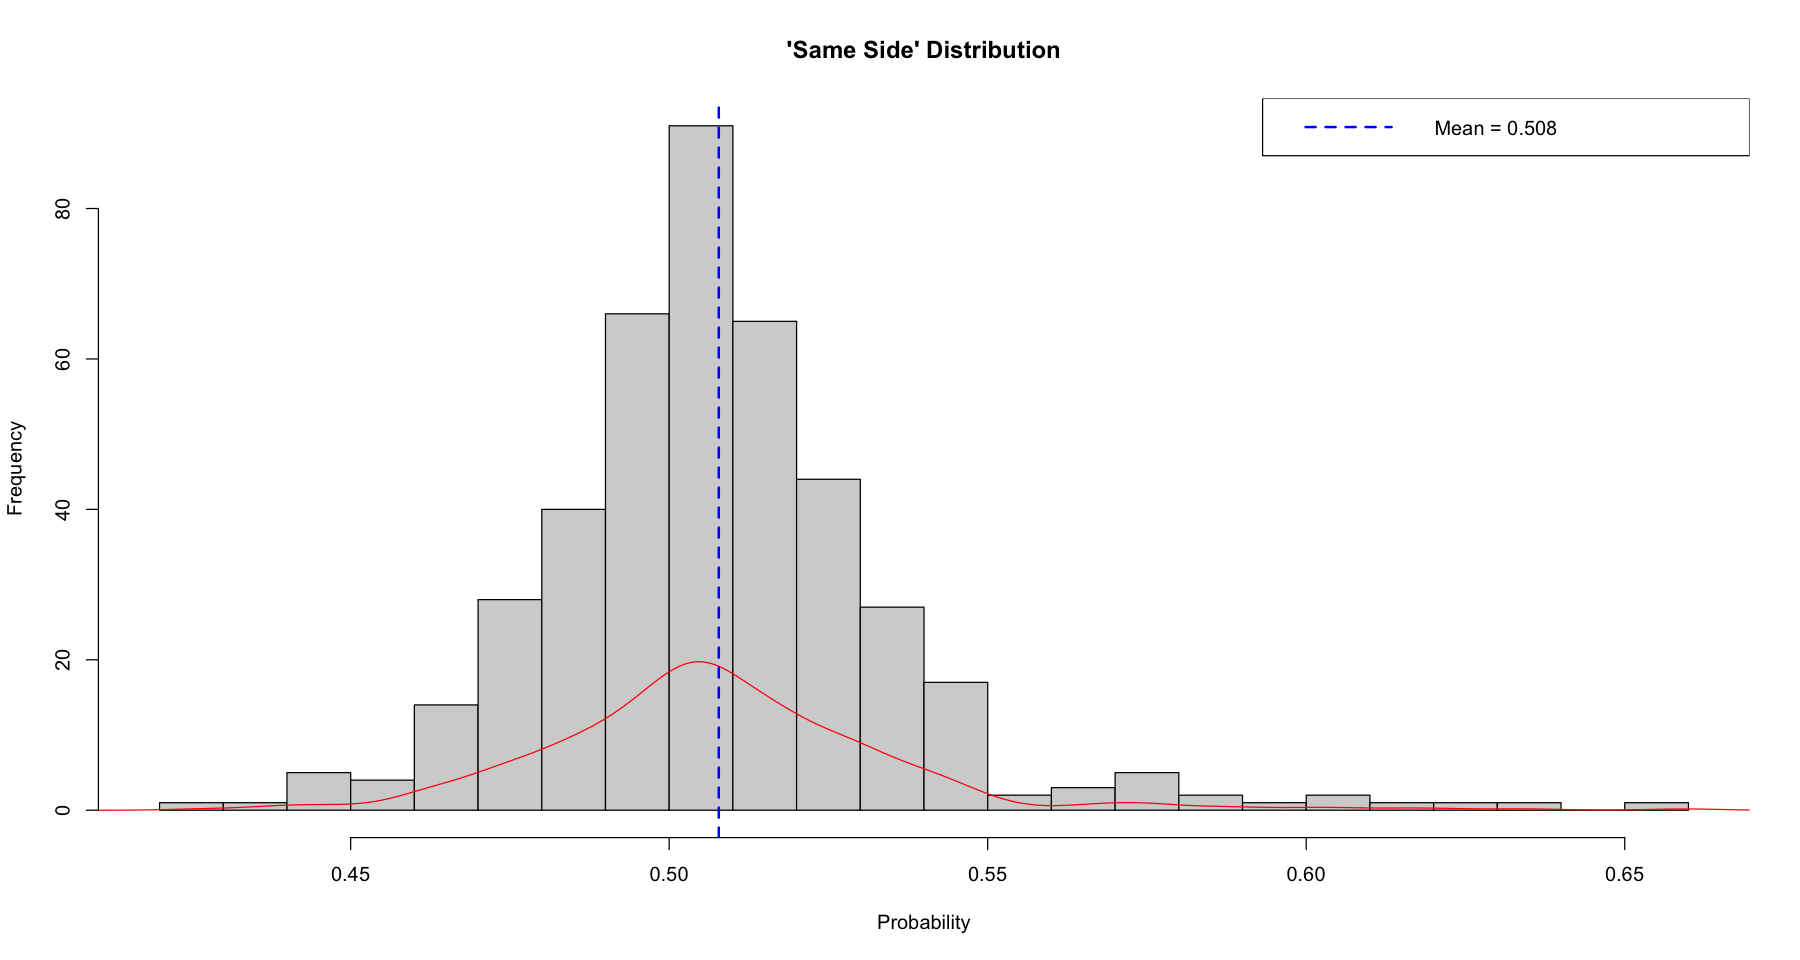

In [67]:
df$prop <- df$y/df$m
hist(df$prop, 
     main="'Same Side' Distribution",
     xlab="Probability",
     ylab="Frequency",
     breaks=30)
lines(density(df$prop), col="red")

mean_prop <- mean(df$prop)

abline(v=mean_prop, col="blue", lwd=2, lty=2)

summary_stats <- summary(df$prop)
text(x=0.1, y=max(hist(df$prop, plot=FALSE)$counts),
     paste("Mean:", round(mean(df$prop), 3), "\n",
           "Median:", round(median(df$prop), 3), "\n",
           "SD:", round(sd(df$prop), 3)),
     pos=4)

legend("topright", 
       legend=paste("Mean =", round(mean_prop, 3)),
       col="blue", 
       lty=2,
       lwd=2)

shapiro.test(df$prop)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
ℹ Results may be unexpected or may change in future versions of ggplot2.”


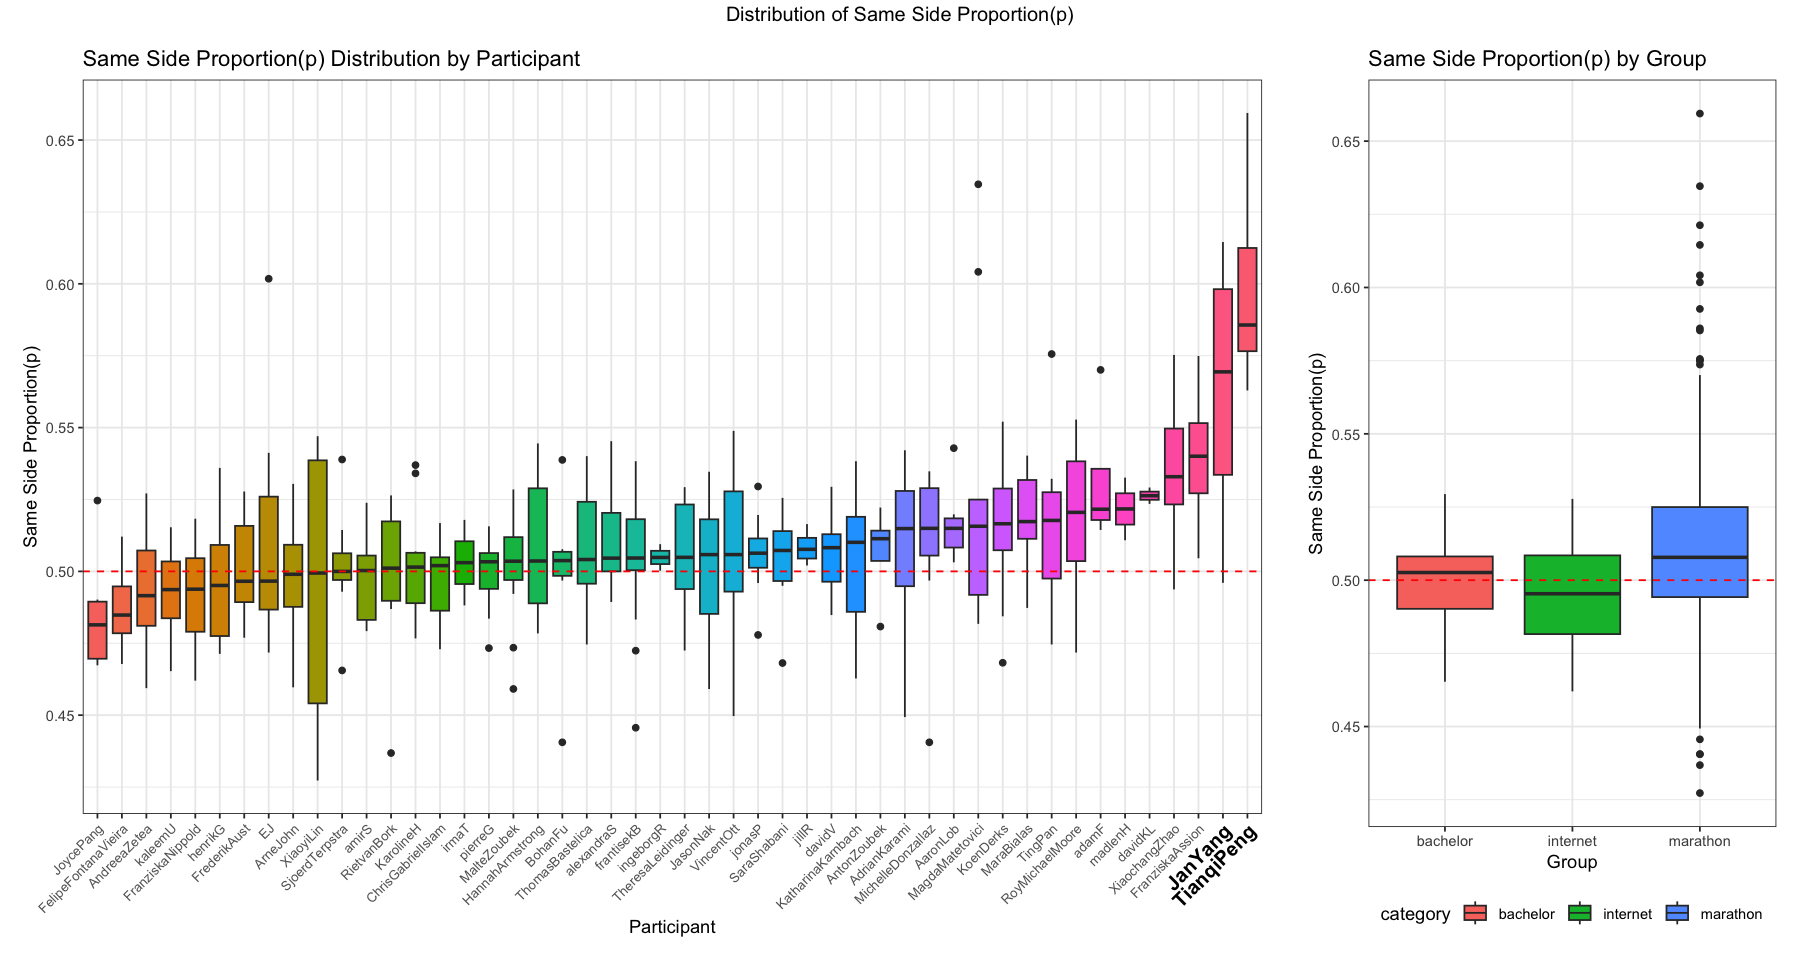

In [61]:
# 计算 prop
df$prop <- df$y/df$m

# 计算每个人的中位数并排序
person_medians <- aggregate(prop ~ person, data = df, FUN = median)
person_order <- person_medians[order(person_medians$prop), "person"]

# 将 person 转换为有序因子，使用排序后的顺序
df$person <- factor(df$person, levels = person_order)

# 创建第一个箱线图 - 按参与者显示
p1 <- ggplot(df, aes(x=person, y=prop, fill=person)) +
  geom_boxplot() +
  theme_bw() +
  theme(axis.text.x = element_text(
    angle = 45, 
    hjust = 1,
    face = ifelse(levels(df$person) %in% c("JanYang", "TianqiPeng"), "bold", "plain"),
    size = ifelse(levels(df$person) %in% c("JanYang", "TianqiPeng"), 12, 8),
    colour = ifelse(levels(df$person) %in% c("JanYang", "TianqiPeng"), "black", "grey40")
  ),
  plot.margin = unit(c(0.5,0.5,0.5,0.5), "cm"),
  legend.position = "none") +
  labs(
    title = "Same Side Proportion(p) Distribution by Participant",
    x = "Participant",
    y = "Same Side Proportion(p)"
  ) +
  geom_hline(yintercept = 0.5, color = "red", linetype = "dashed")

# 创建第二个箱线图 - 按组别显示
p2 <- ggplot(df, aes(x=category, y=prop, fill=category)) +
  geom_boxplot() +
  theme_bw() +
  theme(legend.position = "bottom",
        plot.margin = unit(c(0.5,0.5,0.5,0.5), "cm")) +
  labs(
    title = "Same Side Proportion(p) by Group",
    x = "Group",
    y = "Same Side Proportion(p)"
  ) +
  geom_hline(yintercept = 0.5, color = "red", linetype = "dashed")

# 设置图形设备的大小（单位为英寸）
options(repr.plot.width=15, repr.plot.height=8)

# 调整布局比例和大小
grid.arrange(p1, p2, ncol=2, widths=c(2.5, 1),
            layout_matrix = rbind(c(1, 2)),
            top = "Distribution of Same Side Proportion(p)")

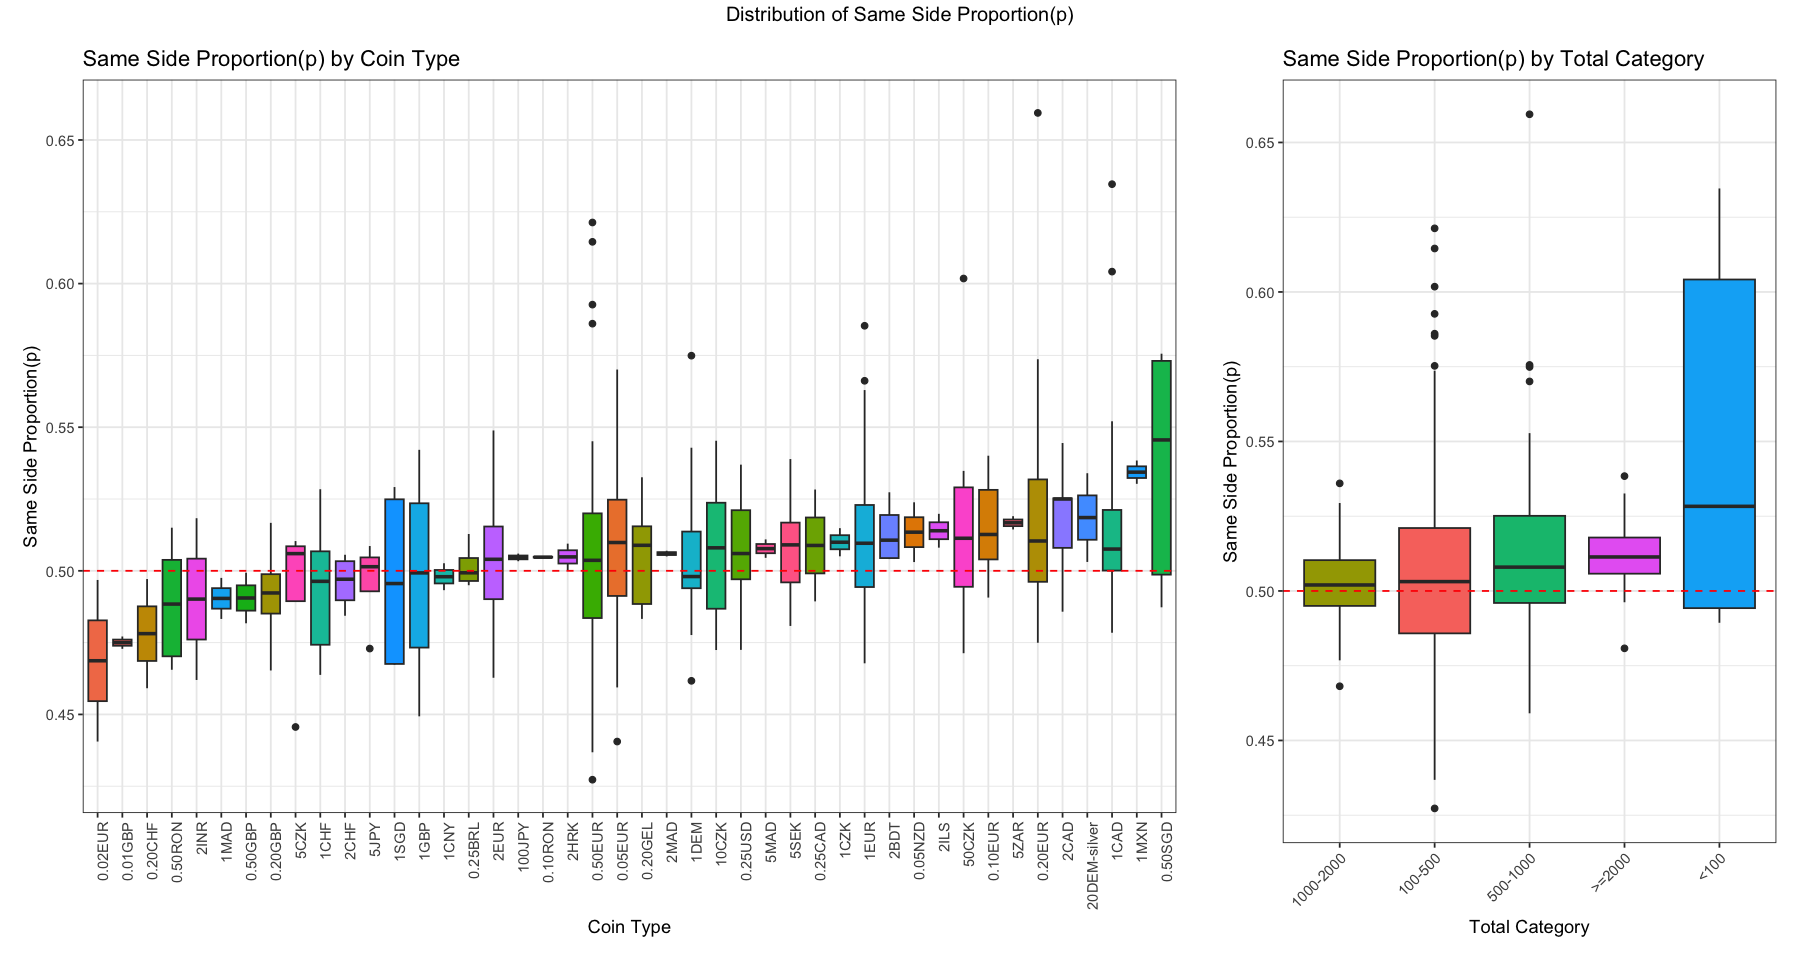

In [65]:
# 1. 按硬币类型显示（添加排序）
p1 <- ggplot(df, aes(x=reorder(coin, prop), y=prop, fill=coin)) +
  geom_boxplot() +
  theme_bw() +
  theme(legend.position = "none",  # 移除图例
        plot.margin = unit(c(0.5,0.5,0.5,0.5), "cm"),
        axis.text.x = element_text(angle = 90, hjust = 1)) +  # 竖直显示x轴标签
  labs(
    title = "Same Side Proportion(p) by Coin Type",
    x = "Coin Type",
    y = "Same Side Proportion(p)"
  ) +
  geom_hline(yintercept = 0.5, color = "red", linetype = "dashed")

# 2. 按total_category显示（添加排序）
p2 <- ggplot(df, aes(x=reorder(total_category, prop), y=prop, fill=total_category)) +
  geom_boxplot() +
  theme_bw() +
  theme(legend.position = "none",  # 移除图例
        plot.margin = unit(c(0.5,0.5,0.5,0.5), "cm"),
        axis.text.x = element_text(angle = 45, hjust = 1)) +
  labs(
    title = "Same Side Proportion(p) by Total Category",
    x = "Total Category",
    y = "Same Side Proportion(p)"
  ) +
  geom_hline(yintercept = 0.5, color = "red", linetype = "dashed")

options(repr.plot.width=15, repr.plot.height=8)

grid.arrange(p1, p2, ncol=2, widths=c(2, 1),
            top = "Distribution of Same Side Proportion(p)")

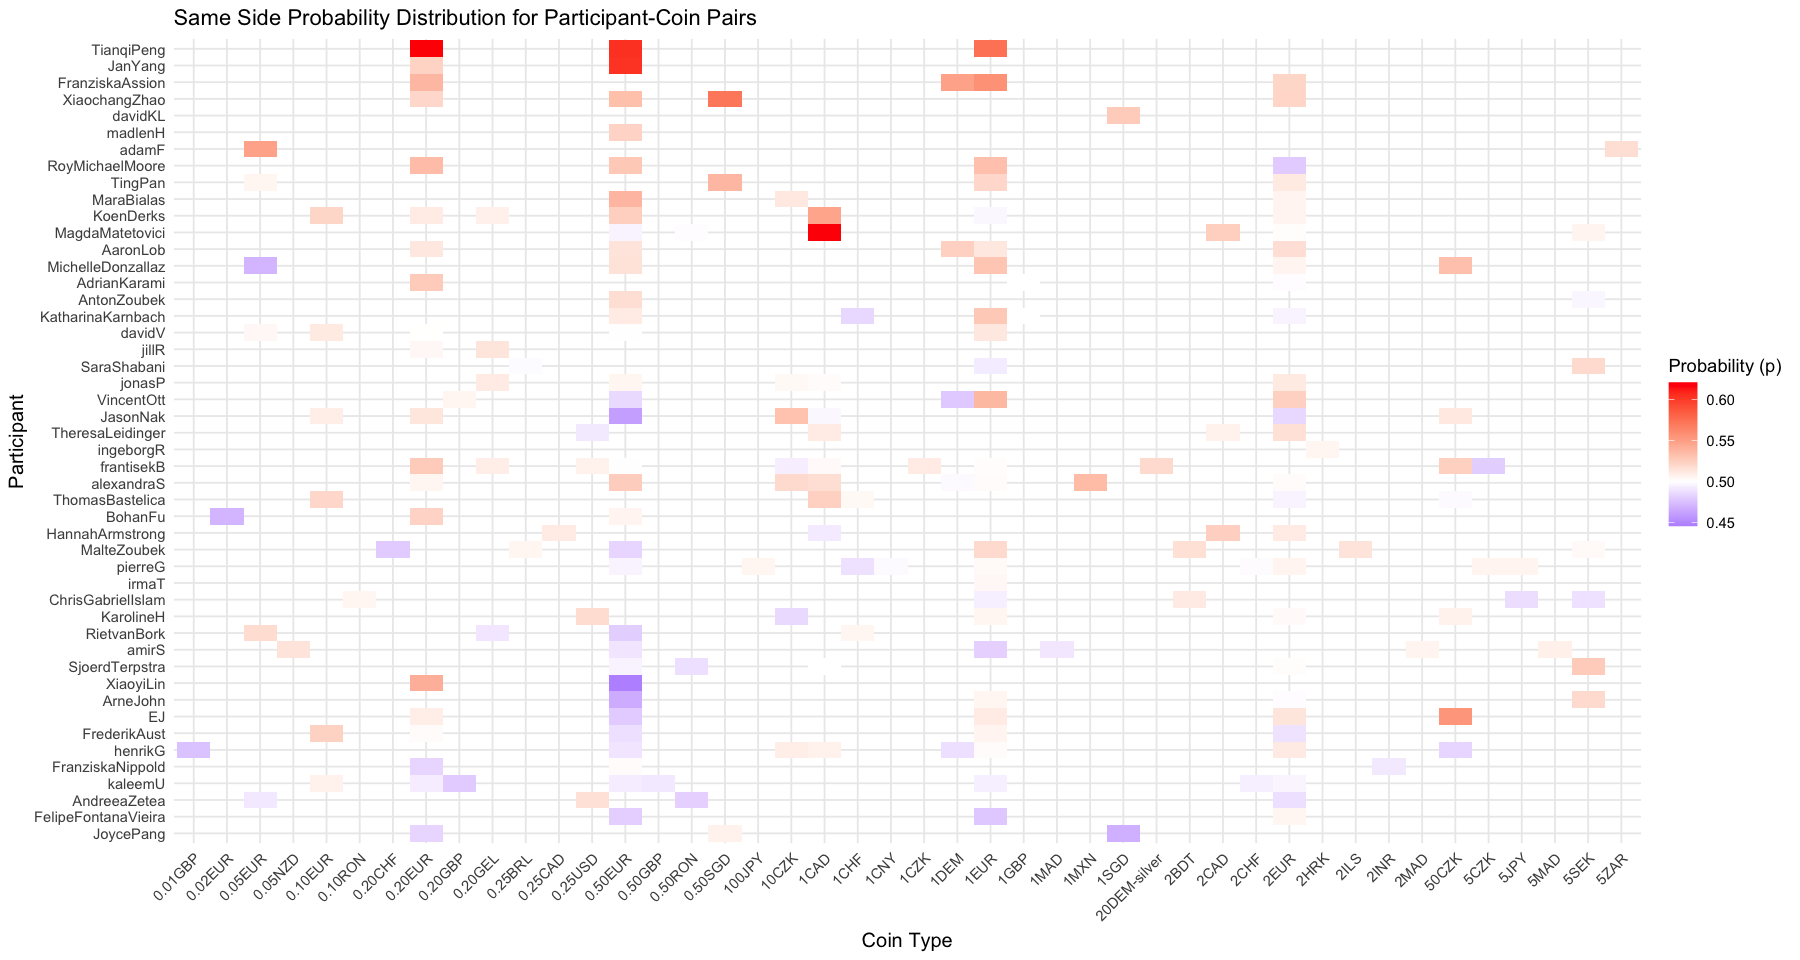

In [71]:
# 加载必要的包
library(dplyr)
library(ggplot2)

# 计算每个participant-coin pair的p值
# 方法1：使用dplyr
pair_summary <- df %>%
  group_by(person, coin) %>%
  summarise(
    p = sum(y)/sum(m),
    n_flips = sum(m),
    .groups = 'drop'
  )

# 或者方法2：使用基础R（如果dplyr不可用）
pair_summary <- aggregate(
  cbind(y, m) ~ person + coin, 
  data = df,
  FUN = sum
)
pair_summary$p <- pair_summary$y / pair_summary$m

# 创建热力图
ggplot(pair_summary, aes(x = coin, y = person, fill = p)) +
  geom_tile() +
  scale_fill_gradient2(
    low = "blue", 
    mid = "white",
    high = "red",
    midpoint = 0.5
  ) +
  theme_minimal() +
  theme(
    axis.text.x = element_text(angle = 45, hjust = 1),
    axis.title = element_text(size = 12)
  ) +
  labs(
    title = "Same Side Probability Distribution for Participant-Coin Pairs",
    x = "Coin Type",
    y = "Participant",
    fill = "Probability (p)"
  )

In [43]:
# 获取所有可能的变量组合
vars <- c("person", "coin", "group", "total_category")
n_vars <- length(vars)
all_combinations <- list()
for(i in 0:n_vars) {
  combinations <- combn(vars, i, simplify = FALSE)
  all_combinations <- c(all_combinations, combinations)
}

# 创建存储结果的数据框
results <- data.frame(
  model = character(),
  deviance = numeric(),
  df = numeric(),
  aic = numeric(),
  bic = numeric(),
  stringsAsFactors = FALSE
)

# 对每个组合拟合模型
for(combination in all_combinations) {
  # 构建公式
  if(length(combination) == 0) {
    formula <- as.formula("cbind(y, m - y) ~ 1")
    model_name <- "Intercept only"
  } else {
    formula <- as.formula(paste("cbind(y, m - y) ~", paste(combination, collapse = " + ")))
    model_name <- paste(combination, collapse = " + ")
  }
  
  # 拟合模型
  model <- glm(formula, family = binomial, data = df)
  
  # 存储结果
  results <- rbind(results, data.frame(
    model = model_name,
    deviance = deviance(model),
    df = df.residual(model),
    aic = AIC(model),
    bic = BIC(model),
    stringsAsFactors = FALSE
  ))
}

# 按AIC排序并显示结果
results <- results[order(results$aic),]
print(results)

                                    model deviance  df      aic      bic
8                 person + total_category 377.5291 372 3384.706 3586.956
14        person + group + total_category 377.5291 372 3384.706 3586.956
13         person + coin + total_category 312.7361 330 3403.913 3776.053
16 person + coin + group + total_category 312.7361 330 3403.913 3776.053
2                                  person 420.6084 374 3423.785 3617.945
7                          person + group 420.6084 374 3423.785 3617.945
6                           person + coin 354.2164 332 3441.393 3805.444
12                  person + coin + group 354.2164 332 3441.393 3805.444
15          coin + group + total_category 546.8664 374 3550.043 3744.203
9                            coin + group 557.1568 376 3556.334 3742.404
11                 group + total_category 653.4518 417 3570.629 3590.854
4                                   group 664.1794 419 3577.356 3589.491
3                                    coin 585.5556 

In [44]:
library(lme4)

# 准备数据
# 确保所有分类变量都是因子类型
df$person <- factor(df$person)
df$coin <- factor(df$coin)
df$group <- factor(df$group)
df$total_category <- factor(df$total_category)

# 拟合所有模型
# GLMM1: 只有截距
m1 <- glm(cbind(y, m-y) ~ 1, family=binomial, data=df)

# 固定效应模型
# GLMM2: 组别
m2 <- glm(cbind(y, m-y) ~ group, family=binomial, data=df)

# GLMM3: 翻转次数类别
m3 <- glm(cbind(y, m-y) ~ total_category, family=binomial, data=df)

# GLMM4: 组别+翻转次数类别
m4 <- glm(cbind(y, m-y) ~ group + total_category, family=binomial, data=df)

# 随机效应模型
# GLMM5: 随机参与者效应
m5 <- glmer(cbind(y, m-y) ~ 1 + (1|person), family=binomial, data=df)

# GLMM6: 随机参与者和硬币效应
m6 <- glmer(cbind(y, m-y) ~ 1 + (1|person) + (1|person:coin), family=binomial, data=df)

# 混合模型
# GLMM7: 组别+随机参与者效应
m7 <- glmer(cbind(y, m-y) ~ group + (1|person), family=binomial, data=df)

m8 <- glmer(cbind(y, m-y) ~ total_category + (1|person), family=binomial, data=df)

m9 <- glmer(cbind(y, m-y) ~ group + total_category + (1|person), family=binomial, data=df)

m10 <- glmer(cbind(y, m-y) ~ group + (1|person) + (1|person:coin), family=binomial, data=df)

m11 <- glmer(cbind(y, m-y) ~ total_category + (1|person) + (1|person:coin), family=binomial, data=df)

m12 <- glmer(cbind(y, m-y) ~ group + total_category + (1|person) + (1|person:coin), family=binomial, data=df)

# 创建结果比较表
models <- list(m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12)
results <- data.frame(
  Model = paste0("GLMM", 1:12),
  df = sapply(models, function(m) df.residual(m)),
  Deviance = sapply(models, function(m) deviance(m)),
  AIC = sapply(models, AIC),
  BIC = sapply(models, BIC)
)

# 按AIC排序显示结果
results[order(results$AIC),]

,Model,df,Deviance,AIC,BIC
,<chr>,<int>,<dbl>,<dbl>,<dbl>
12,GLMM12,415,297.6823,3441.361,3469.676
11,GLMM11,417,299.7253,3443.557,3463.782
9,GLMM9,416,390.4360,3448.872,3473.142
8,GLMM8,418,388.9499,3450.324,3466.504
6,GLMM6,419,349.5112,3470.457,3482.592
10,GLMM10,417,349.2250,3470.791,3491.016
5,GLMM5,420,433.9850,3477.631,3485.721
7,GLMM7,418,435.3710,3478.444,3494.624
4,GLMM4,417,653.4518,3570.629,3590.854


In [45]:
# 拟合GLMM12模型
model_12 <- glmer(
  cbind(y, m-y) ~ group + total_category + (1|person) + (1|person:coin),
  family = binomial,
  data = df,
  control = glmerControl(optimizer = "bobyqa",
                        optCtrl = list(maxfun = 100000))
)

# 显示详细的模型摘要
summary(model_12)

# 查看模型的AIC和BIC
cat("\nAIC:", AIC(model_12))
cat("\nBIC:", BIC(model_12))

# 查看随机效应
print(VarCorr(model_12))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(y, m - y) ~ group + total_category + (1 | person) + (1 |  
    person:coin)
   Data: df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
  3441.4   3469.7  -1713.7   3427.4      415 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.6835 -0.5565  0.0117  0.5180  3.1798 

Random effects:
 Groups      Name        Variance  Std.Dev.
 person:coin (Intercept) 0.0009616 0.03101 
 person      (Intercept) 0.0041770 0.06463 
Number of obs: 422, groups:  person:coin, 211; person, 48

Fixed effects:
                      Estimate Std. Error z value Pr(>|z|)  
(Intercept)           -0.04853    0.04263  -1.138   0.2549  
groupinternet         -0.03400    0.05018  -0.677   0.4981  
groupmarathon          0.05527    0.03206   1.724   0.0847 .
total_category300-500  0.00695    0.


AIC: 3441.361
BIC: 3469.676 Groups      Name        Std.Dev.
 person:coin (Intercept) 0.031009
 person      (Intercept) 0.064630


In [47]:

model_without_person <- glmer(cbind(y, m-y) ~ total_category + (1|person:coin),
                            family = binomial, data = df)

model_with_person <- glmer(cbind(y, m-y) ~ total_category + (1|person) + (1|person:coin),
                          family = binomial, data = df)

print(anova(model_without_person, model_with_person))

Data: df
Models:
model_without_person: cbind(y, m - y) ~ total_category + (1 | person:coin)
model_with_person: cbind(y, m - y) ~ total_category + (1 | person) + (1 | person:coin)
                     npar    AIC    BIC  logLik deviance  Chisq Df Pr(>Chisq)
model_without_person    4 3495.6 3511.7 -1743.8   3487.6                     
model_with_person       5 3443.6 3463.8 -1716.8   3433.6 54.006  1  1.998e-13
                        
model_without_person    
model_with_person    ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


[1] "基础统计量："
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.4273  0.4923  0.5052  0.5078  0.5204  0.6594 
[1] "\nShapiro-Wilk正态性检验："

	Shapiro-Wilk normality test

data:  df$prop
W = 0.93312, p-value = 8.152e-13



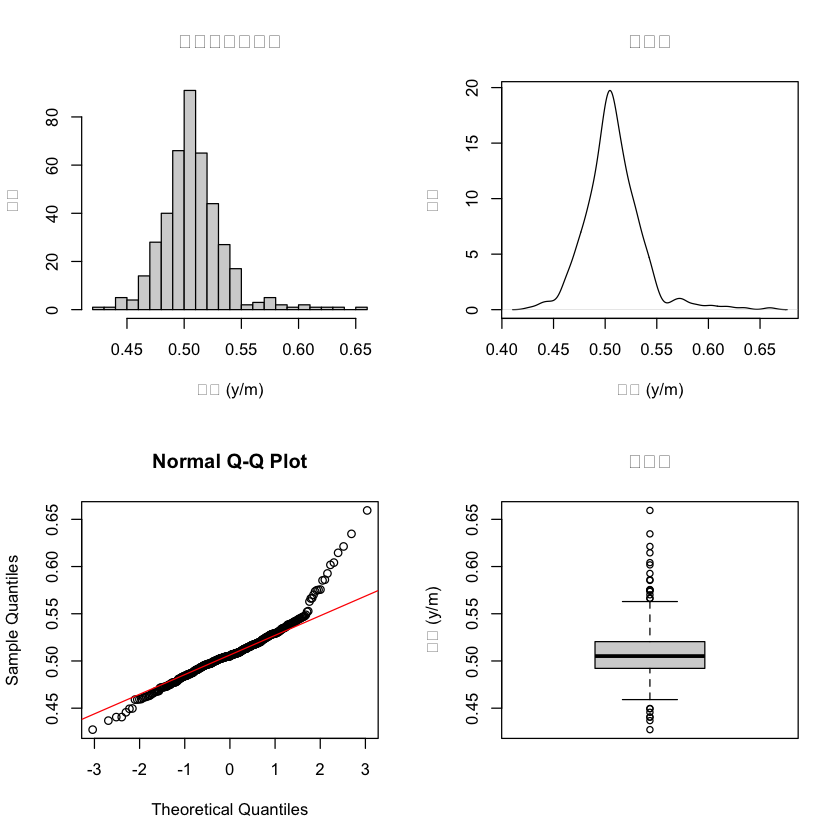

In [51]:
# 计算比例
df$prop <- df$y/df$m

# 1. 基础统计量
summary_stats <- summary(df$prop)
print("基础统计量：")
print(summary_stats)

# 2. 创建多面板图形
par(mfrow=c(2,2))

# 直方图
hist(df$prop, 
     main="比例分布直方图",
     xlab="比例 (y/m)",
     ylab="频数",
     breaks=30)

# 密度图
plot(density(df$prop), 
     main="密度图",
     xlab="比例 (y/m)",
     ylab="密度")

# Q-Q图检验正态性
qqnorm(df$prop)
qqline(df$prop, col="red")

# 箱线图
boxplot(df$prop, 
        main="箱线图",
        ylab="比例 (y/m)")

# 3. 进行Shapiro-Wilk正态性检验
shapiro_test <- shapiro.test(df$prop)
print("\nShapiro-Wilk正态性检验：")
print(shapiro_test)

In [53]:
# 首先创建必要的变量
df$proportion <- df$y/df$m        # 计算比例
df$weights <- 4 * df$m           # 计算权重

# 获取所有可能的变量组合
vars <- c("person", "coin", "group", "total_category")
n_vars <- length(vars)
all_combinations <- list()
for(i in 0:n_vars) {
  combinations <- combn(vars, i, simplify = FALSE)
  all_combinations <- c(all_combinations, combinations)
}

# 创建存储结果的数据框
results <- data.frame(
  model = character(),
  deviance = numeric(),
  df = numeric(),
  aic = numeric(),
  bic = numeric(),
  stringsAsFactors = FALSE
)

# 对每个组合拟合WLS模型
for(combination in all_combinations) {
  # 构建公式
  if(length(combination) == 0) {
    formula <- as.formula("proportion ~ 1")
    model_name <- "Intercept only"
  } else {
    formula <- as.formula(paste("proportion ~", paste(combination, collapse = " + ")))
    model_name <- paste(combination, collapse = " + ")
  }
  
  # 拟合WLS模型
  model <- lm(formula, weights = weights, data = df)
  
  # 计算deviance (使用加权残差平方和)
  dev <- sum(model$weights * model$residuals^2)
  
  # 存储结果
  results <- rbind(results, data.frame(
    model = model_name,
    deviance = dev,
    df = df.residual(model),
    aic = AIC(model),
    bic = BIC(model),
    stringsAsFactors = FALSE
  ))
}

results <- results[order(results$aic),]
print(results)

                                    model deviance  df       aic       bic
8                 person + total_category 376.0651 372 -2051.667 -1845.372
14        person + group + total_category 376.0651 372 -2051.667 -1845.372
13         person + coin + total_category 311.3644 330 -2047.340 -1671.155
16 person + coin + group + total_category 311.3644 330 -2047.340 -1671.155
2                                  person 419.0916 374 -2009.953 -1811.748
7                          person + group 419.0916 374 -2009.953 -1811.748
6                           person + coin 352.7835 332 -1998.636 -1630.541
12                  person + coin + group 352.7835 332 -1998.636 -1630.541
11                 group + total_category 650.9920 417 -1910.101 -1885.831
4                                   group 661.7161 419 -1907.206 -1891.026
15          coin + group + total_category 544.4789 374 -1899.499 -1701.294
1                          Intercept only 684.3945 421 -1896.985 -1888.895
9                        


Call:
lm(formula = proportion ~ person + coin + total_category, data = df, 
    weights = weights)

Weighted Residuals:
     Min       1Q   Median       3Q      Max 
-2.98869 -0.48467  0.02904  0.55834  2.19684 

Coefficients: (1 not defined because of singularities)
                            Estimate Std. Error t value Pr(>|t|)    
(Intercept)                0.4828437  0.0183847  26.263  < 2e-16 ***
personAdrianKarami        -0.0004140  0.0104729  -0.040 0.968489    
personAndreeaZetea        -0.0199651  0.0099494  -2.007 0.045602 *  
personAntonZoubek         -0.0132297  0.0082158  -1.610 0.108292    
personArneJohn            -0.0122553  0.0098750  -1.241 0.215468    
personBohanFu              0.0076418  0.0128230   0.596 0.551618    
personChrisGabrielIslam   -0.0301974  0.0090862  -3.323 0.000989 ***
personEJ                  -0.0042475  0.0096217  -0.441 0.659178    
personFelipeFontanaVieira -0.0233153  0.0076006  -3.068 0.002337 ** 
personFranziskaAssion      0.0354069  0.0

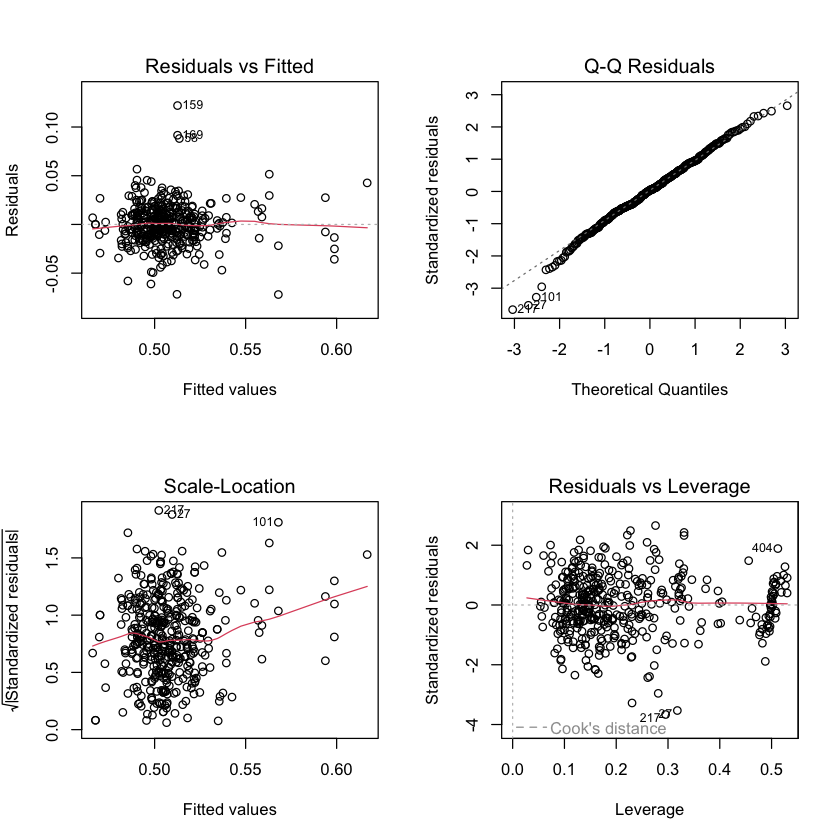

In [55]:
# 准备数据
df$proportion <- df$y/df$m
df$weights <- 4 * df$m

# 拟合模型
model <- lm(proportion ~ person + coin + total_category, 
           weights = weights, 
           data = df)

# 显示详细的模型摘要
summary_result <- summary(model)
print(summary_result)

# 查看ANOVA结果
anova_result <- anova(model)
print("\nANOVA结果：")
print(anova_result)

# 查看模型的AIC和BIC
cat("\nAIC:", AIC(model))
cat("\nBIC:", BIC(model))

# 模型诊断图
par(mfrow=c(2,2))
plot(model)

# 提取total_category的效应
cat("\ntotal_category的效应：\n")
print(coef(model)[grep("total_category", names(coef(model)))])

# 计算调整后的R方
cat("\n调整后的R方：", summary_result$adj.r.squared)

In [28]:
# 创建存储结果的数据框
results_mixed <- data.frame(
  model = character(),
  deviance = numeric(),
  AIC = numeric(),
  BIC = numeric(),
  df = numeric(),
  stringsAsFactors = FALSE
)

# 定义固定效应组合
fixed_effects <- list(
  "1" = "1",
  "tc" = "1 + total_category",
  "g" = "1 + group",
  "tc_g" = "1 + total_category + group",
  "tc_g_int" = "1 + total_category * group"
)

# 定义随机效应组合（确保coin始终嵌套在person下）
random_effects <- list(
  "basic" = "(1|person:coin)",
  "group" = "(1|group) + (1|person:coin)",
  "group_person" = "(1|group) + (1|group:person) + (1|person:coin)",
  "person" = "(1|person) + (1|person:coin)",
  "full" = "(1|group) + (1|person) + (1|group:person) + (1|person:coin)"
)

# 创建所有可能的组合并拟合模型
for(f_name in names(fixed_effects)) {
  for(r_name in names(random_effects)) {
    # 构建完整的模型公式
    formula_str <- paste("cbind(y, m-y) ~", 
                        fixed_effects[[f_name]], "+",
                        random_effects[[r_name]])
    model_name <- paste(f_name, r_name, sep="_")
    
    tryCatch({
      # 拟合模型
      model <- glmer(as.formula(formula_str), 
                     family = binomial, 
                     data = df,
                     control = glmerControl(optimizer = "bobyqa",
                                          optCtrl = list(maxfun = 100000)))
      
      # 计算统计量
      results_mixed <- rbind(results_mixed, data.frame(
        model = model_name,
        formula = formula_str,
        deviance = deviance(model),
        AIC = AIC(model),
        BIC = BIC(model),
        df = df.residual(model),
        stringsAsFactors = FALSE
      ))
      
      # 打印进度
      cat("成功拟合模型:", model_name, "\n")
      
    }, error = function(e) {
      cat("模型", model_name, "拟合失败：", conditionMessage(e), "\n")
    })
  }
}

# 按AIC排序
results_mixed <- results_mixed[order(results_mixed$AIC), ]

# # 显示前10个最佳模型
# print(head(results_mixed, 10))

# # 保存完整结果到CSV文件
# write.csv(results_mixed, "model_comparison_results_full.csv", row.names = FALSE)

# # 创建一个简洁的结果摘要
# summary_table <- results_mixed[, c("model", "AIC", "BIC", "df")]
# write.csv(summary_table, "model_comparison_summary.csv", row.names = FALSE)

成功拟合模型: 1_basic 
成功拟合模型: 1_group 
成功拟合模型: 1_group_person 
成功拟合模型: 1_person 


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model is nearly unidentifiable: large eigenvalue ratio
 - Rescale variables?”


成功拟合模型: 1_full 
成功拟合模型: tc_basic 
成功拟合模型: tc_group 
成功拟合模型: tc_group_person 
成功拟合模型: tc_person 


Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“unable to evaluate scaled gradient”
Warning message in checkConv(attr(opt, "derivs"), opt$par, ctrl = control$checkConv, :
“Model failed to converge: degenerate  Hessian with 1 negative eigenvalues”


成功拟合模型: tc_full 
成功拟合模型: g_basic 


boundary (singular) fit: see help('isSingular')



成功拟合模型: g_group 


boundary (singular) fit: see help('isSingular')



成功拟合模型: g_group_person 
成功拟合模型: g_person 


boundary (singular) fit: see help('isSingular')



成功拟合模型: g_full 
成功拟合模型: tc_g_basic 


boundary (singular) fit: see help('isSingular')



成功拟合模型: tc_g_group 


boundary (singular) fit: see help('isSingular')



成功拟合模型: tc_g_group_person 
成功拟合模型: tc_g_person 


boundary (singular) fit: see help('isSingular')



成功拟合模型: tc_g_full 


fixed-effect model matrix is rank deficient so dropping 14 columns / coefficients



成功拟合模型: tc_g_int_basic 


fixed-effect model matrix is rank deficient so dropping 14 columns / coefficients

boundary (singular) fit: see help('isSingular')



成功拟合模型: tc_g_int_group 


fixed-effect model matrix is rank deficient so dropping 14 columns / coefficients

boundary (singular) fit: see help('isSingular')



成功拟合模型: tc_g_int_group_person 


fixed-effect model matrix is rank deficient so dropping 14 columns / coefficients



成功拟合模型: tc_g_int_person 


fixed-effect model matrix is rank deficient so dropping 14 columns / coefficients

boundary (singular) fit: see help('isSingular')



成功拟合模型: tc_g_int_full 


In [30]:
print(results_mixed)

                   model
19           tc_g_person
18     tc_g_group_person
8        tc_group_person
20             tc_g_full
10               tc_full
9              tc_person
24       tc_g_int_person
23 tc_g_int_group_person
25         tc_g_int_full
16            tc_g_basic
17            tc_g_group
4               1_person
3         1_group_person
5                 1_full
7               tc_group
14              g_person
13        g_group_person
15                g_full
21        tc_g_int_basic
22        tc_g_int_group
11               g_basic
12               g_group
6               tc_basic
2                1_group
1                1_basic
                                                                                                    formula
19                                cbind(y, m-y) ~ 1 + total_category + group + (1|person) + (1|person:coin)
18              cbind(y, m-y) ~ 1 + total_category + group + (1|group) + (1|group:person) + (1|person:coin)
8                       cb

In [43]:
# 拟合指定的混合效应模型
model_mixed <- glmer(
  cbind(y, m-y) ~ 1 + total_category + (1|person)+(1|person:coin),
  family = binomial,
  data = df,
  control = glmerControl(optimizer = "bobyqa",
                        optCtrl = list(maxfun = 100000))
)

# 显示详细的模型摘要
summary(model_mixed)

# 查看模型的AIC和BIC
cat("\nAIC:", AIC(model_mixed))
cat("\nBIC:", BIC(model_mixed))

# 查看随机效应
print(VarCorr(model_mixed))

Generalized linear mixed model fit by maximum likelihood (Laplace
  Approximation) [glmerMod]
 Family: binomial  ( logit )
Formula: 
cbind(y, m - y) ~ 1 + total_category + (1 | person) + (1 | person:coin)
   Data: df
Control: glmerControl(optimizer = "bobyqa", optCtrl = list(maxfun = 1e+05))

     AIC      BIC   logLik deviance df.resid 
  3445.9   3478.3  -1715.0   3429.9      414 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.52813 -0.55178  0.02006  0.51621  3.14351 

Random effects:
 Groups      Name        Variance  Std.Dev.
 person:coin (Intercept) 0.0007645 0.02765 
 person      (Intercept) 0.0050253 0.07089 
Number of obs: 422, groups:  person:coin, 211; person, 48

Fixed effects:
                         Estimate Std. Error z value Pr(>|z|)    
(Intercept)             0.0003926  0.0132632   0.030  0.97638    
total_category1000-2000 0.0512389  0.0157955   3.244  0.00118 ** 
total_category2000-5000 0.0734423  0.0183441   4.004 6.24e-05 ***
total_category5


AIC: 3445.949
BIC: 3478.309 Groups      Name        Std.Dev.
 person:coin (Intercept) 0.027649
 person      (Intercept) 0.070890


In [38]:
# 加载必要的包
library(lmerTest)  # 这会自动加载 lme4

# 重新拟合模型（使用lmerTest）
model_mixed <- glmer(
  cbind(y, m-y) ~ 1 + total_category + (1|person) + (1|person:coin),
  family = binomial,
  data = df,
  control = glmerControl(optimizer = "bobyqa",
                        optCtrl = list(maxfun = 100000))
)

print(anova(model_mixed, type = "III"))


Warning message in anova.merMod(model_mixed, type = "III"):
“additional arguments ignored: ‘type’”


Analysis of Variance Table
               npar Sum Sq Mean Sq F value
total_category    5 35.741  7.1482  7.1482



WLS模型摘要：

Call:
lm(formula = proportion ~ total_category, data = df, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-3.2507 -0.7074 -0.0421  0.6571  7.0748 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)              0.504759   0.002242 225.153  < 2e-16 ***
total_category1000-2000 -0.003035   0.003145  -0.965 0.334971    
total_category2000-5000  0.006594   0.003124   2.111 0.035383 *  
total_category500-1000   0.004099   0.002999   1.367 0.172389    
total_category<100       0.038795   0.036767   1.055 0.291966    
total_category>5000      0.021574   0.005549   3.888 0.000118 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.243 on 416 degrees of freedom
Multiple R-squared:  0.06021,	Adjusted R-squared:  0.04891 
F-statistic:  5.33 on 5 and 416 DF,  p-value: 9.225e-05


GLM模型摘要：

Call:
glm(formula = cbind(y, m - y) ~ total_category, family = binomial, 
    

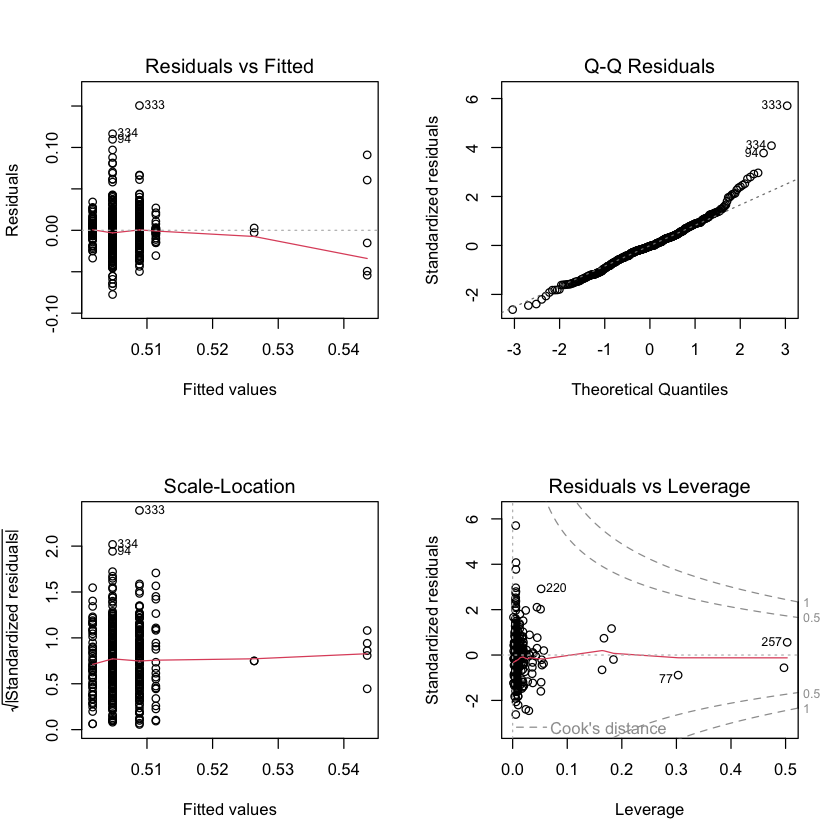

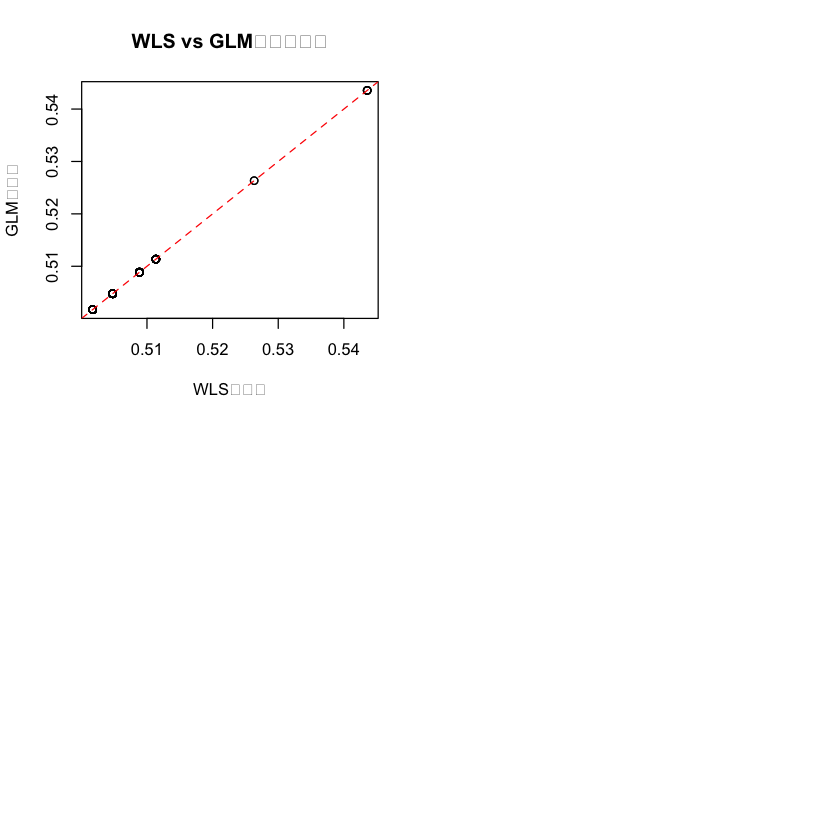

In [44]:
# 1. 准备WLS数据
df$proportion <- df$y/df$m        # 响应变量 (R/m)
df$weights <- 4 * df$m            # 权重 (4m)

# 2. 拟合WLS模型
# 基础模型
wls_basic <- lm(proportion ~ total_category, 
                weights = weights, 
                data = df)

# 3. 比较WLS和GLM结果
# 已有的GLM模型
glm_model <- glm(cbind(y, m-y) ~ total_category, 
                 family = binomial, 
                 data = df)

# 4. 模型诊断
par(mfrow=c(2,2))
plot(wls_basic)

# 5. 输出结果比较
cat("\nWLS模型摘要：\n")
print(summary(wls_basic))

cat("\nGLM模型摘要：\n")
print(summary(glm_model))

# 6. 预测值比较
df$pred_wls <- predict(wls_basic)
df$pred_glm <- predict(glm_model, type="response")

# 7. 计算两种方法的预测值相关性
cor_pred <- cor(df$pred_wls, df$pred_glm)
cat("\n两种方法预测值的相关系数：", cor_pred, "\n")

# 8. 可视化比较
plot(df$pred_wls, df$pred_glm,
     xlab = "WLS预测值",
     ylab = "GLM预测值",
     main = "WLS vs GLM预测值比较")
abline(0, 1, col="red", lty=2)

In [45]:
# 获取所有可能的变量组合
vars <- c("person", "coin", "group", "total_category")
n_vars <- length(vars)
all_combinations <- list()
for(i in 0:n_vars) {
  combinations <- combn(vars, i, simplify = FALSE)
  all_combinations <- c(all_combinations, combinations)
}

# 创建存储结果的数据框
results <- data.frame(
  model = character(),
  deviance = numeric(),
  df = numeric(),
  aic = numeric(),
  bic = numeric(),
  stringsAsFactors = FALSE
)

# 对每个组合拟合WLS模型
for(combination in all_combinations) {
  # 构建公式
  if(length(combination) == 0) {
    formula <- as.formula("proportion ~ 1")
    model_name <- "Intercept only"
  } else {
    formula <- as.formula(paste("proportion ~", paste(combination, collapse = " + ")))
    model_name <- paste(combination, collapse = " + ")
  }
  
  # 拟合WLS模型
  model <- lm(formula, weights = weights, data = df)
  
  # 计算deviance (使用加权残差平方和)
  dev <- sum(model$weights * model$residuals^2)
  
  # 存储结果
  results <- rbind(results, data.frame(
    model = model_name,
    deviance = dev,
    df = df.residual(model),
    aic = AIC(model),
    bic = BIC(model),
    stringsAsFactors = FALSE
  ))
}

# 按AIC排序并显示结果
results <- results[order(results$aic),]
print(results)

# # 可视化比较
# par(mfrow=c(2,2))
# # AIC比较
# plot(results$aic, 
#      main="AIC by Model",
#      ylab="AIC",
#      xlab="Model Number")

# # BIC比较
# plot(results$bic,
#      main="BIC by Model",
#      ylab="BIC",
#      xlab="Model Number")

# # Deviance比较
# plot(results$deviance,
#      main="Deviance by Model",
#      ylab="Deviance",
#      xlab="Model Number")

# # 自由度比较
# plot(results$df,
#      main="Degrees of Freedom by Model",
#      ylab="DF",
#      xlab="Model Number")

# # 保存结果到CSV文件（可选）
# write.csv(results, "model_comparison_results.csv", row.names = FALSE)

                                    model deviance  df       aic       bic
8                 person + total_category 369.0008 370 -2055.670 -1841.284
14        person + group + total_category 369.0008 370 -2055.670 -1841.284
13         person + coin + total_category 305.6010 328 -2051.225 -1666.949
16 person + coin + group + total_category 305.6010 328 -2051.225 -1666.949
2                                  person 419.0916 374 -2009.953 -1811.748
7                          person + group 419.0916 374 -2009.953 -1811.748
6                           person + coin 352.7835 332 -1998.636 -1630.541
12                  person + coin + group 352.7835 332 -1998.636 -1630.541
11                 group + total_category 572.7656 410 -1950.126 -1897.541
15          coin + group + total_category 500.3634 367 -1921.156 -1694.635
5                          total_category 643.1872 416 -1913.191 -1884.876
4                                   group 640.7439 415 -1912.797 -1880.437
9                        

In [50]:
# 定义固定效应组合
fixed_effects <- list(
  "1" = "1",
  "tc" = "total_category"  # 移除了1+，因为lm会自动包含截距
)

# 定义随机效应组合
random_effects <- list(
  "p" = "person",
  "pc" = "person:coin",
  "p_pc" = "person + person:coin",
  "g_pc" = "group + person:coin",
  "g_p_pc" = "group + person + person:coin"
)

# 创建存储结果的数据框
results_wls <- data.frame(
  model = character(),
  formula = character(),
  r_squared = numeric(),
  adj_r_squared = numeric(),
  aic = numeric(),
  bic = numeric(),
  df = numeric(),
  stringsAsFactors = FALSE
)

# 准备WLS数据
df$proportion <- df$y/df$m
df$weights <- 4 * df$m

# 创建所有可能的组合并拟合模型
for(f_name in names(fixed_effects)) {
  for(r_name in names(random_effects)) {
    # 构建完整的模型公式
    formula_str <- paste("proportion ~", 
                        fixed_effects[[f_name]], "+",
                        random_effects[[r_name]])
    model_name <- paste(f_name, r_name, sep="_")
    
    tryCatch({
      # 拟合WLS模型
      model <- lm(as.formula(formula_str), 
                  weights = weights, 
                  data = df)
      
      # 计算统计量
      results_wls <- rbind(results_wls, data.frame(
        model = model_name,
        formula = formula_str,
        r_squared = summary(model)$r.squared,
        adj_r_squared = summary(model)$adj.r.squared,
        aic = AIC(model),
        bic = BIC(model),
        df = df.residual(model),
        stringsAsFactors = FALSE
      ))
      
      cat("成功拟合模型:", model_name, "\n")
      
    }, error = function(e) {
      cat("模型", model_name, "拟合失败：", conditionMessage(e), "\n")
    })
  }
}

# 按AIC排序并显示结果
results_wls <- results_wls[order(results_wls$aic), ]
print(results_wls)

成功拟合模型: 1_p 
成功拟合模型: 1_pc 
成功拟合模型: 1_p_pc 
成功拟合模型: 1_g_pc 
成功拟合模型: 1_g_p_pc 
成功拟合模型: tc_p 
成功拟合模型: tc_pc 
成功拟合模型: tc_p_pc 
成功拟合模型: tc_g_pc 
成功拟合模型: tc_g_p_pc 
       model                                                    formula
7      tc_pc                  proportion ~ total_category + person:coin
8    tc_p_pc         proportion ~ total_category + person + person:coin
9    tc_g_pc          proportion ~ total_category + group + person:coin
10 tc_g_p_pc proportion ~ total_category + group + person + person:coin
6       tc_p                       proportion ~ total_category + person
1        1_p                                    proportion ~ 1 + person
2       1_pc                               proportion ~ 1 + person:coin
3     1_p_pc                      proportion ~ 1 + person + person:coin
4     1_g_pc                       proportion ~ 1 + group + person:coin
5   1_g_p_pc              proportion ~ 1 + group + person + person:coin
   r_squared adj_r_squared       aic       bic  d


Call:
lm(formula = proportion ~ total_category + person + person:coin, 
    data = df, weights = weights)

Weighted Residuals:
    Min      1Q  Median      3Q     Max 
-1.6796 -0.3899  0.0000  0.3879  1.6130 

Coefficients: (1902 not defined because of singularities)
                                             Estimate Std. Error t value
(Intercept)                                 4.706e-01  8.613e-03  54.644
total_category1000-2000                     4.569e-02  4.968e-03   9.197
total_category2000-5000                     6.578e-02  1.026e-02   6.413
total_category500-1000                      2.493e-02  2.475e-03  10.073
total_category<100                         -1.075e-01  5.496e-02  -1.956
total_category>5000                         5.569e-02  9.170e-03   6.074
personAdrianKarami                          1.567e-02  1.477e-02   1.061
personAndreeaZetea                         -8.575e-03  1.274e-02  -0.673
personAntonZoubek                          -3.992e-02  1.264e-02  -3.159
p

Warning message:
“not plotting observations with leverage one:
  77, 288”


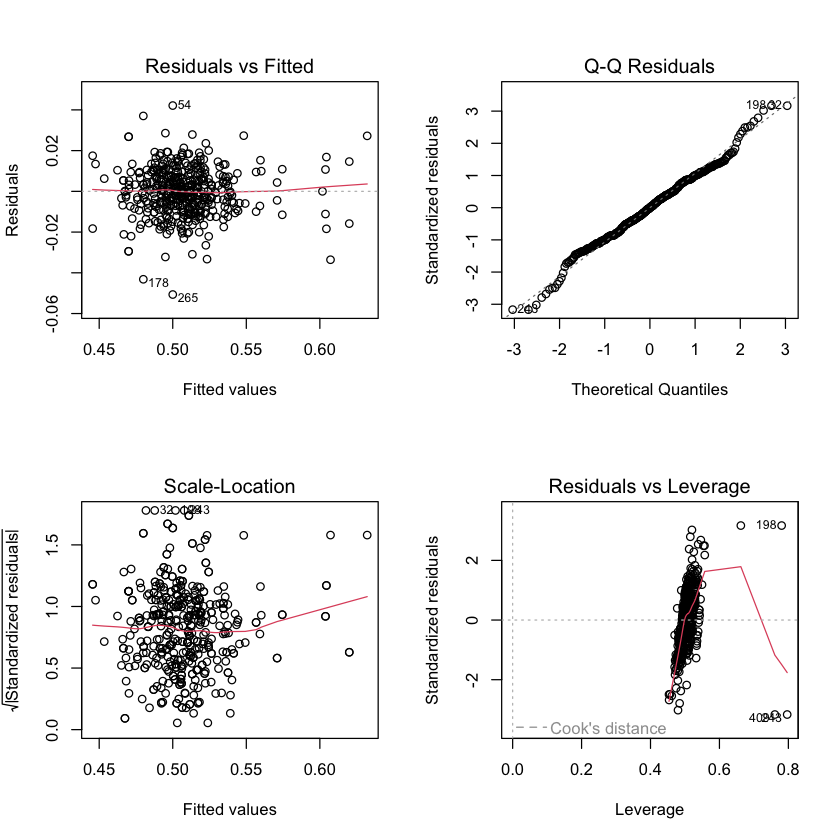

In [51]:
# 准备WLS数据
df$proportion <- df$y/df$m
df$weights <- 4 * df$m

# 拟合指定的WLS模型
wls_model <- lm(proportion ~ total_category + person + person:coin, 
                weights = weights, 
                data = df)

# 显示详细的模型摘要
summary_result <- summary(wls_model)
print(summary_result)

# 查看模型的AIC和BIC
cat("\nAIC:", AIC(wls_model))
cat("\nBIC:", BIC(wls_model))

# 模型诊断图
par(mfrow=c(2,2))
plot(wls_model)

# 计算VIF检查多重共线性（如果需要）
# library(car)
# vif(wls_model)